# EXTENDED FIGURE 9

In [1]:
import os
import requests
import pandas as pd
import numpy as np
import cloudvolume
from caveclient import CAVEclient
import nglui
from statistics import mean
import matplotlib.pyplot as plt


In [2]:
#Load dataframe
synapse_table = pd.read_feather("ET_extended_synapse_table_revision.feather")

In [3]:
syn_per_con = []

pre_soma_IDs = synapse_table.pre_pt_root_id.unique()

for ii,pre_soma_ID in enumerate(pre_soma_IDs): 
    
    #print(pre_soma_ID)
    
    post_soma_IDs =  synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID)].post_pt_root_id.unique()
    
    for ii,post_soma_ID in enumerate(post_soma_IDs):
        
        values = {
            
            
#          print(len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
#                                     (synapse_table['post_pt_root_id'] == post_soma_ID)]))         
                    'syn_per_con': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                        (synapse_table['post_pt_root_id'] == post_soma_ID)]),
                    'total_synapse_size': synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                        (synapse_table['post_pt_root_id'] == post_soma_ID)]['size'].sum(),
                    
                    'class': synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                        (synapse_table['post_pt_root_id'] == post_soma_ID)].consensus_class.iloc[0],
                    
                    'pre_pt_root_id': pre_soma_ID, 
                    
                    'post_pt_root_id': post_soma_ID, 
                    
        }
        syn_per_con.append(values)
    
syn_per_con_df = pd.DataFrame(syn_per_con)

In [4]:
syn_per_con_df.head(10)

,syn_per_con,total_synapse_size,class,pre_pt_root_id,post_pt_root_id
0,6,71280,inhibitory,864691136974876956,864691135582634349
1,1,9416,inhibitory,864691136974876956,864691136262206861
2,3,30848,excitatory,864691136974876956,864691135754457549
3,1,10380,excitatory,864691136974876956,864691135214045752
4,2,36348,excitatory,864691136974876956,864691135123586599
5,3,17352,inhibitory,864691136974876956,864691135394967797
6,13,192676,inhibitory,864691136974876956,864691135386608213
7,1,5644,inhibitory,864691136974876956,864691135494070416
8,1,14428,excitatory,864691136974876956,864691135079662936
9,1,31720,unclear,864691136974876956,864691135991692227


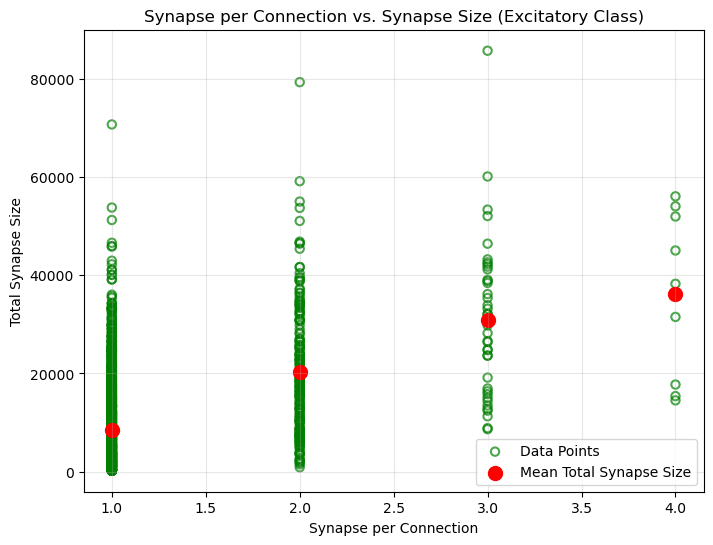

In [5]:
#Extended Figure 9.D

import pandas as pd
import matplotlib.pyplot as plt

excitatory_df = syn_per_con_df[syn_per_con_df['class'] == 'excitatory']

# Calculate the mean total synapse size for each unique syn_per_con value in the excitatory class
mean_sizes = excitatory_df.groupby('syn_per_con')['total_synapse_size'].mean()

# Scatterplot with empty circles for the "excitatory" class
plt.figure(figsize=(8, 6))
plt.scatter(
    excitatory_df['syn_per_con'], 
    excitatory_df['total_synapse_size'], 
    edgecolor='green',  # Circle outline color
    facecolor='none',   # Empty fill
    linewidth=1.5,      # Thickness of the circle outline
    alpha=0.7,          # Transparency for points
    label='Data Points'
)

# Add the mean values as a separate marker
plt.scatter(
    mean_sizes.index, 
    mean_sizes.values, 
    color='red',         # Mean marker color
    s=100,               # Marker size
    label='Mean Total Synapse Size'
)

# Add plot details
plt.title('Synapse per Connection vs. Synapse Size (Excitatory Class)')
plt.xlabel('Synapse per Connection')
plt.ylabel('Total Synapse Size')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

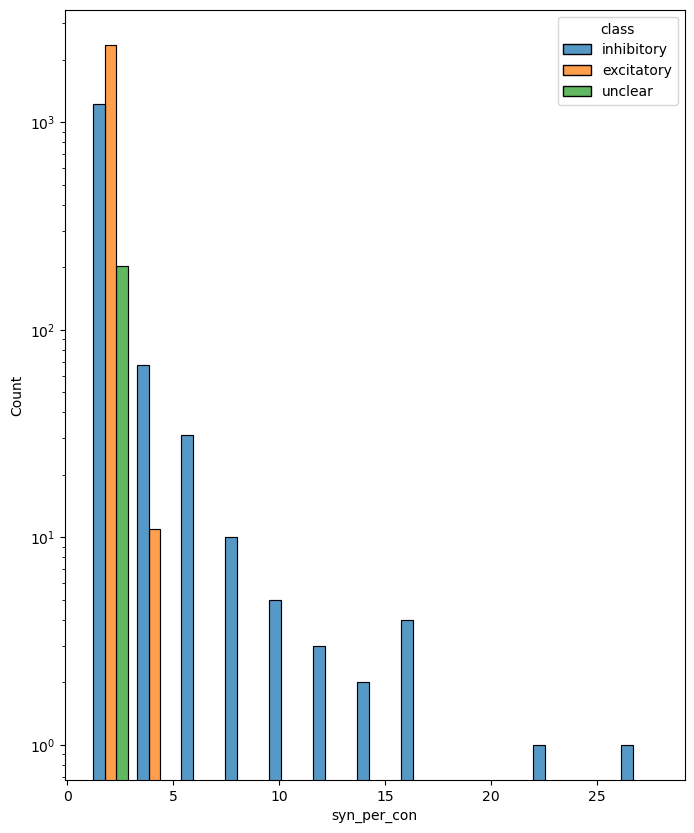

In [9]:
#Original submission

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(8,10))

ax = sns.histplot(data=syn_per_con_df, x="syn_per_con", hue="class", multiple="dodge", shrink=.8)


ax.set_yscale('log') 
plt.savefig('Extended_6. origan submision.eps')



In [14]:
excitatory_df.syn_per_con.unique()

array([3, 1, 2, 4])

/var/folders/00/wp8zkrbx7_d37cqwh2t69ycr0000gp/T/ipykernel_95391/711697737.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inhibitory_df['syn_per_con']= inhibitory_df['syn_per_con'].astype(np.float64)


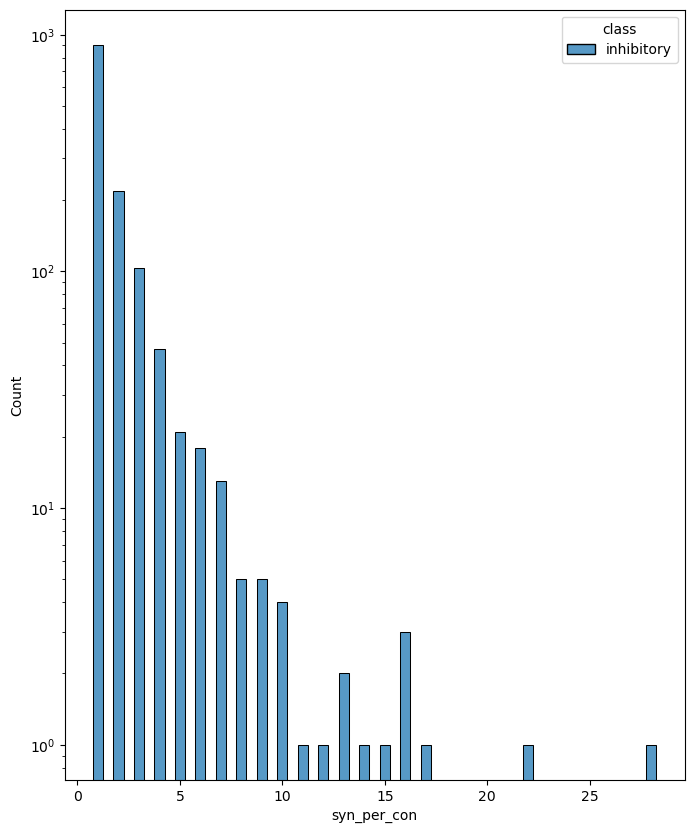

In [21]:
# MAIN
# Excitatory
# Extended Fig 9.a

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Revision
# Filter the DataFrame to include only inhibitory subclasses


inhibitory_df = syn_per_con_df[syn_per_con_df['class'] == 'inhibitory']  
inhibitory_df['syn_per_con']= inhibitory_df['syn_per_con'].astype(np.float64)
max_conn = int(inhibitory_df['syn_per_con'].max())
f, ax = plt.subplots(figsize=(8,10))
ax = sns.histplot(data=inhibitory_df, x="syn_per_con", hue="class",
                  shrink=0.5, multiple="dodge", bins = np.arange(0.5,max_conn+1.5, dtype=np.float64))
ax.set_yscale('log')

plt.savefig('Extended_9_inh_revision.eps')

/var/folders/00/wp8zkrbx7_d37cqwh2t69ycr0000gp/T/ipykernel_95391/392773967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  excitatory_df['syn_per_con']= excitatory_df['syn_per_con'].astype(np.float64)


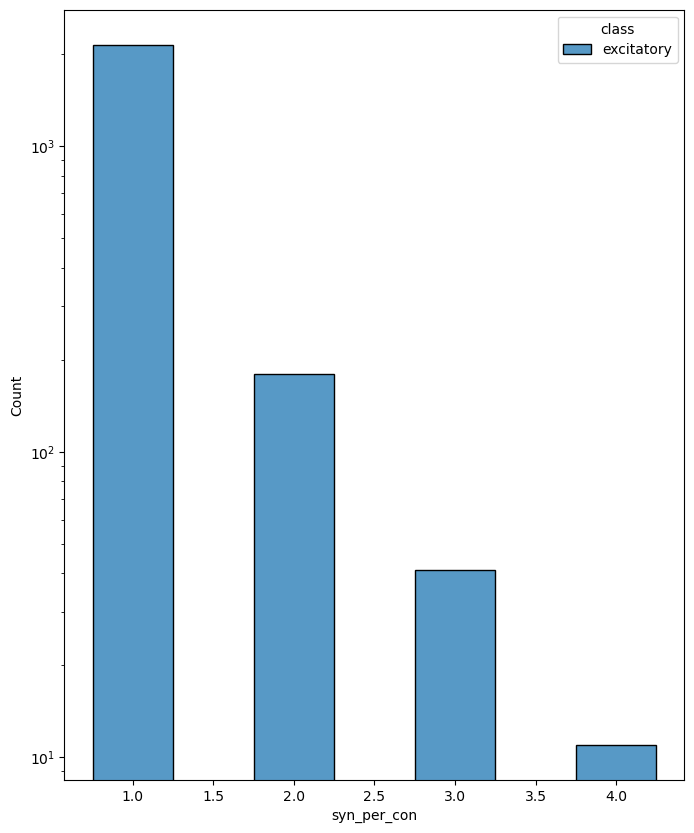

In [19]:
# MAIN
# Excitatory
# Extended Fig 9.b

# Revision
# Filter the DataFrame to include only excitatory subclasses
excitatory_df = syn_per_con_df[syn_per_con_df['class'] == 'excitatory']  # Adjust 'excitatory' to match your data
excitatory_df['syn_per_con']= excitatory_df['syn_per_con'].astype(np.float64)
max_conn = int(excitatory_df['syn_per_con'].max())
f, ax = plt.subplots(figsize=(8,10))
ax = sns.histplot(data=excitatory_df, x="syn_per_con", hue="class",
                  shrink=0.5, multiple="dodge", bins = np.arange(0.5,max_conn+1.5, dtype=np.float64))
ax.set_yscale('log')

plt.savefig('Extended_9_exc_revision.eps')

/var/folders/00/wp8zkrbx7_d37cqwh2t69ycr0000gp/T/ipykernel_95391/1145430608.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inhibitory_df['syn_per_con']= inhibitory_df['syn_per_con'].astype(np.float64)


ValueError: Could not interpret value `subclass` for `hue`. An entry with this name does not appear in `data`.

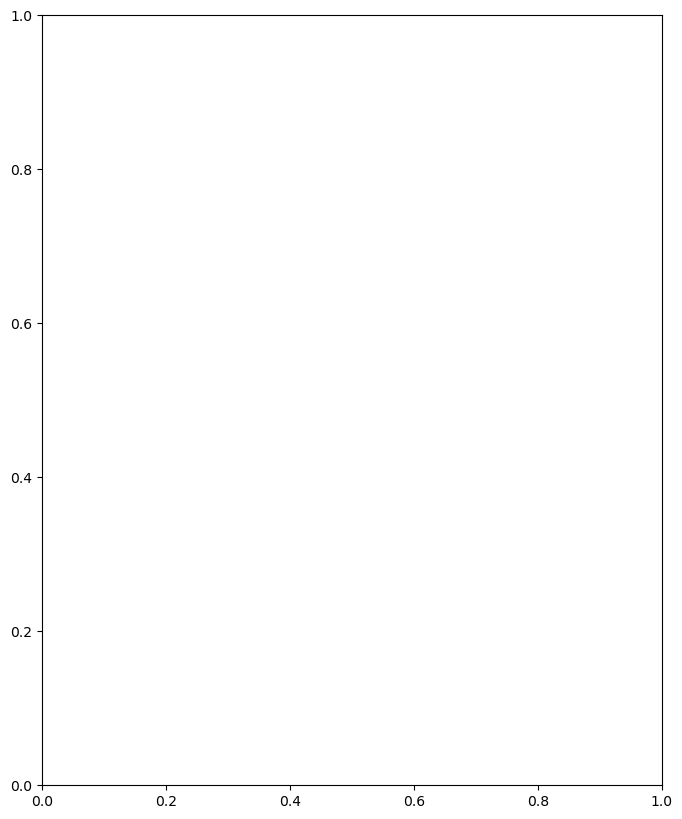

In [17]:
#Revision
# Filter the DataFrame to include only inhibitory subclasses


inhibitory_df = syn_per_con_df[syn_per_con_df['class'] == 'inhibitory']  
inhibitory_df['syn_per_con']= inhibitory_df['syn_per_con'].astype(np.float64)
max_conn = int(inhibitory_df['syn_per_con'].max())
f, ax = plt.subplots(figsize=(8,10))
ax = sns.histplot(data=inhibitory_df, x="syn_per_con", hue="subclass",
                  shrink=0.5, multiple="dodge", bins = np.arange(0.5,max_conn+1.5, dtype=np.float64))
ax.set_yscale('log')

plt.savefig('Extended_9_inh_revision.eps')

In [ ]:
#Extended Figure 9.C

import pandas as pd
import matplotlib.pyplot as plt

inhibitory_df = syn_per_con_df[syn_per_con_df['class'] == 'inhibitory']

# Calculate the mean total synapse size for each unique syn_per_con value in the excitatory class
mean_sizes = inhibitory_df.groupby('syn_per_con')['total_synapse_size'].mean()

# Scatterplot with empty circles for the "inhibitory" class
plt.figure(figsize=(8, 6))
plt.scatter(
    inhibitory_df['syn_per_con'], 
    inhibitory_df['total_synapse_size'], 
    edgecolor='green',  # Circle outline color
    facecolor='none',   # Empty fill
    linewidth=1.5,      # Thickness of the circle outline
    alpha=0.7,          # Transparency for points
    label='Data Points'
)

# Add the mean values as a separate marker
plt.scatter(
    mean_sizes.index, 
    mean_sizes.values, 
    color='red',         # Mean marker color
    s=100,               # Marker size
    label='Mean Total Synapse Size'
)

# Add plot details
plt.title('Synapse per Connection vs. Synapse Size (Inhibitory Class)')
plt.xlabel('Synapse per Connection')
plt.ylabel('Total Synapse Size')
plt.legend()
plt.grid(alpha=0.3)

plt.savefig('Extended_9C_inh_revision.eps')

plt.show()

In [ ]:
#Extended Figure 9.D

import pandas as pd
import matplotlib.pyplot as plt

excitatory_df = syn_per_con_df[syn_per_con_df['class'] == 'excitatory']

# Calculate the mean total synapse size for each unique syn_per_con value in the excitatory class
mean_sizes = excitatory_df.groupby('syn_per_con')['total_synapse_size'].mean()

# Scatterplot with empty circles for the "excitatory" class
plt.figure(figsize=(8, 6))
plt.scatter(
    excitatory_df['syn_per_con'], 
    excitatory_df['total_synapse_size'], 
    edgecolor='green',  # Circle outline color
    facecolor='none',   # Empty fill
    linewidth=1.5,      # Thickness of the circle outline
    alpha=0.7,          # Transparency for points
    label='Data Points'
)

# Add the mean values as a separate marker
plt.scatter(
    mean_sizes.index, 
    mean_sizes.values, 
    color='red',         # Mean marker color
    s=100,               # Marker size
    label='Mean Total Synapse Size'
)

# Add plot details
plt.title('Synapse per Connection vs. Synapse Size (Excitatory Class)')
plt.xlabel('Synapse per Connection')
plt.ylabel('Total Synapse Size')
plt.legend()
plt.grid(alpha=0.3)

plt.savefig('Extended_9D_Exc_revision.eps')

plt.show()